### Lecture 4, Intro to chroma feature computation: summing band energies

This notebook targets taking baby steps towards computing chromagrams: summing energies in bands(with octave wrap). It is a simplified example computed on a synthetic guitar sound for educational purposes. 

Your task is to implement the summing of spectrum amplitude in a 12-dimensional chroma vector which requires correctly mapping a frequency bin number to the index of the chroma vector. You are expected to write your code within the marked places in the second coding-cell: #Your code starts here .....#Your code ends here

In [1]:
import os
import sys
import numpy as np
from essentia.standard import *
from scipy.fftpack import fft
from scipy.signal import get_window
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import IPython.display as ipd

A4_HZ=440
A4_MIDI=69
NUM_NOTES_OCT=12

In [2]:
#Initialize parameters
windowSize=4096;hopSize=2048;fs=44100;
fftN=4096
minFreq=100
minFreqBin=round(minFreq*fftN/fs)
maxFreqBin=round(minFreq*pow(2,4)*fftN/fs)#consider 4 octaves for computation
midiNumbers=list(np.arange(60,72))#C5-B5 range

#Read and normalize the signal
x = MonoLoader(filename = '../data/chroma/guitarOpenStrings_synth.mp3', sampleRate = fs)()
x=x/np.max(np.abs(x))

w = Windowing(type = 'hann')
mX = []
chroma = []
for frame in FrameGenerator(x, frameSize = windowSize, hopSize = hopSize):
    X=fft(w(frame),fftN)#computing fft
    ampSpec=np.abs(X[:int(fftN/2)])#taking first half of the spectrum and its magnitude
    ampSpec[ampSpec<np.finfo(float).eps]=np.finfo(float).eps#getting rid of zeros before log in the next step
    mX.append(20*np.log10(ampSpec))
    #summing energies
    bandEnergies=np.array([0.0]*12)
    for freqBin in np.arange(minFreqBin,maxFreqBin):
        #Your code starts here
        # Write the code that maps freqBin to an integer midiNumber and adds
        # the amplitude of the spectrum at that bin at the 
        # corresponding component of 'bandEnergies' array
        
        #Your code ends here
    bandEnergies=bandEnergies/np.sum(bandEnergies)
    chroma.append(bandEnergies)
        
mX=np.array(mX)
chroma=np.array(chroma)


Text(0.5,0,'time(seconds)')

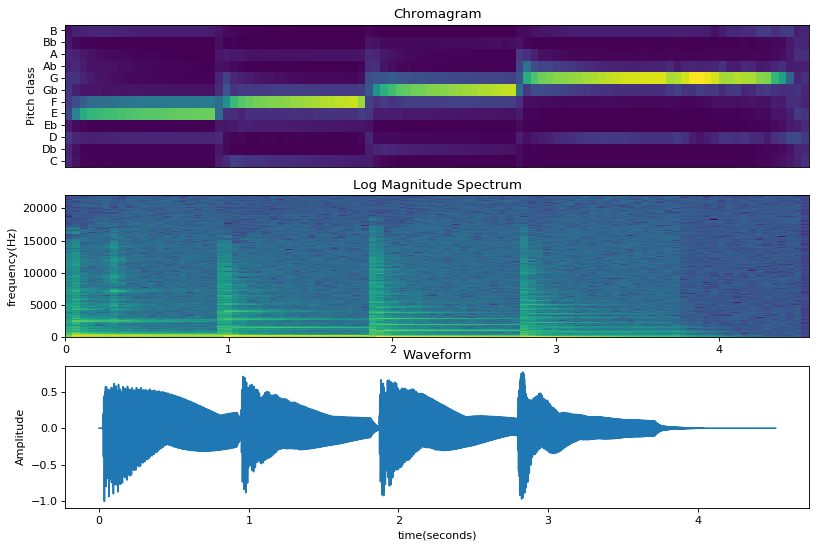

In [3]:
pitchClasses = ['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab','A', 'Bb', 'B']

fig = plt.figure(figsize=(12, 8), dpi=80)

gs = matplotlib.gridspec.GridSpec(3, 1)
ax=plt.subplot(gs[0])
heatmap = ax.pcolor(chroma.transpose())
ax.tick_params(axis='x',which='both',top='off',bottom='off',labelbottom='off') 
ax.set_title('Chromagram')
ax.set_yticks(np.arange(chroma.shape[1]) + 0.5, minor=False)
ax.set_yticklabels(pitchClasses)
ax.set_ylabel('Pitch class')

ax=plt.subplot(gs[1])
timeAxSec=np.arange(mX.shape[0])*hopSize/float(fs)
freqAx_normalized=np.arange(mX.shape[1])/float(fftN)#Normalized frequency axis
freqAxHz=float(fs)*freqAx_normalized
ax.pcolormesh(timeAxSec,freqAxHz,np.transpose(mX))
ax.set_title('Log Magnitude Spectrum')
ax.set_ylabel('frequency(Hz)')

ax=plt.subplot(gs[2])
t=np.arange(x.size)/float(fs)
ax.plot(t,x)
ax.set_title('Waveform')
ax.set_ylabel('Amplitude')
ax.set_xlabel('time(seconds)')
